In [20]:
'''This is a reference notebook where we will load,
build and train a DL model to predict MNIST numbers
using pytorch'''

'''get data from datasets'''

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [21]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [23]:
# put data in loader in order to iterate, shuffle etc...
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)


In [24]:
'''build torch model'''

import torch.nn as nn

features_dim = 28*28 #(dimensions of MNIST image data)
hidden_layers = [128, 64]
output_dim = 10

# define the model architecture

class Some_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(features_dim, hidden_layers[0])
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.relu2 = nn.ReLU()
        self.fc_out = nn.Linear(hidden_layers[1], output_dim)
        self.output = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc_out(x)
        x = self.output(x)

        return x

model = Some_NN()


In [25]:
'''train model'''

# define criterion
criterion = nn.NLLLoss()

# define optimizer
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 5

for i in range(0, epochs):
    running_loss = 0
    # do forward pass and calculate loss
    for images, labels in train_dataloader:

        # clear old gradients
        optimizer.zero_grad()

        # forward pass
        output = model.forward(images.view(32, 28*28))

        # calculate loss
        loss = criterion(output, labels)

        # calculate new gradients
        loss.backward()

        # take step
        optimizer.step()

        running_loss += loss.item()

    print(f"running_loss in epoch {i} = {running_loss/len(train_dataloader)}")

running_loss in epoch 0 = 2.19899481271108
running_loss in epoch 1 = 1.7383258275985718
running_loss in epoch 2 = 1.2333137579282125
running_loss in epoch 3 = 0.9980094114303589
running_loss in epoch 4 = 0.8781073966503143


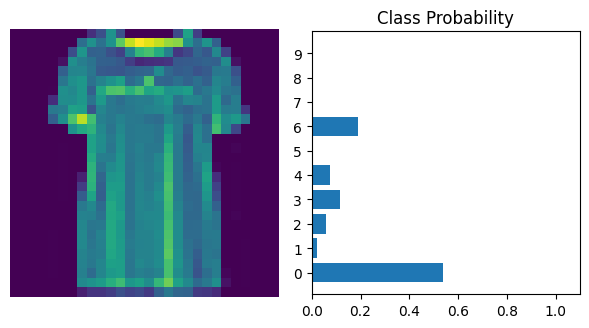

In [35]:
%matplotlib inline
import helper

dataiter = iter(test_dataloader)
images, labels = next(dataiter)

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)